Creating a model from scratch
==============

We describe here how to generate a simple history file for computation with Noddy using the functionality of pynoddy. If possible, it is advisable to generate the history files with the Windows GUI for Noddy as this method provides, to date, a simpler and more complete interface to the entire functionality. 

For completeness, pynoddy contains the functionality to generate simple models, for example to automate the model construction process, or to enable the model construction for users who are not running Windows. Some simple examlpes are shown in the following.

In [1]:
from matplotlib import rc_params

In [2]:
from IPython.core.display import HTML
css_file = 'pynoddy.css'
HTML(open(css_file, "r").read())

In [4]:
import sys, os
import matplotlib.pyplot as plt
# adjust some settings for matplotlib
from matplotlib import rcParams
# print rcParams
rcParams['font.size'] = 15
# determine path of repository to set paths corretly below
repo_path = os.path.realpath('../..')
sys.path.append(repo_path)
import pynoddy.history

In [5]:
%matplotlib inline

In [6]:
rcParams.update({'font.size': 20})

Defining a stratigraphy
--------------

We start with the definition of a (base) stratigraphy for the model. 

In [8]:
# Combined: model generation and output vis to test:
history = "simple_model.his"
output_name = "simple_out"

import importlib
importlib.reload(pynoddy.history)
importlib.reload(pynoddy.events)

# create pynoddy object
nm = pynoddy.history.NoddyHistory()
# add stratigraphy
strati_options = {'num_layers' : 8,
                  'layer_names' : ['layer 1', 'layer 2', 'layer 3', 
                                   'layer 4', 'layer 5', 'layer 6', 
                                   'layer 7', 'layer 8'],
                  'layer_thickness' : [1500, 500, 500, 500, 500, 500, 500, 500]}
nm.add_event('stratigraphy', strati_options )

nm.write_history(history)


In [11]:
# Compute the model
importlib.reload(pynoddy)
pynoddy.compute_model(history, output_name) 

''

/Users/flow/git/pynoddy/pynoddy/output.py:473: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  section_slice = data[:,cell_pos,:].transpose()


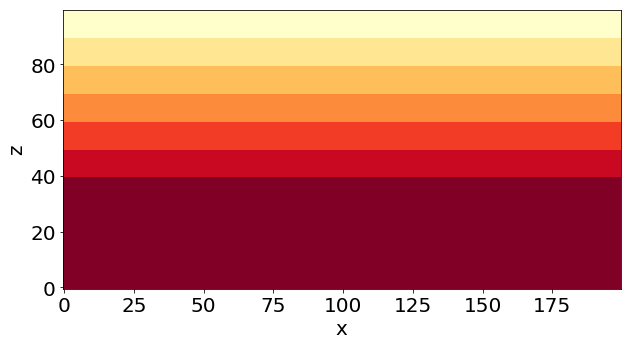

In [13]:
# Plot output
import pynoddy.output
importlib.reload(pynoddy.output)
nout = pynoddy.output.NoddyOutput(output_name)
nout.plot_section('y', layer_labels = strati_options['layer_names'][::-1], 
                  colorbar = True, title="",
                  savefig = False, fig_filename = "ex01_strati.eps")

Add a fault event
----------

As a next step, let's now add the faults to the model.

In [15]:
importlib.reload(pynoddy.history)
importlib.reload(pynoddy.events)
nm = pynoddy.history.NoddyHistory()
# add stratigraphy
strati_options = {'num_layers' : 8,
                  'layer_names' : ['layer 1', 'layer 2', 'layer 3', 'layer 4', 'layer 5', 'layer 6', 'layer 7', 'layer 8'],
                  'layer_thickness' : [1500, 500, 500, 500, 500, 500, 500, 500]}
nm.add_event('stratigraphy', strati_options )




# The following options define the fault geometry:
fault_options = {'name' : 'Fault_E',
                 'pos' : (6000, 0, 5000),
                 'dip_dir' : 270,
                 'dip' : 60,
                 'slip' : 1000}

nm.add_event('fault', fault_options)

In [16]:
nm.events

{1: <pynoddy.events.Stratigraphy at 0x112c9c8d0>,
 2: <pynoddy.events.Fault at 0x112c9c7b8>}

In [17]:
nm.write_history(history)

In [18]:
# Compute the model
pynoddy.compute_model(history, output_name) 

''

/Users/flow/git/pynoddy/pynoddy/output.py:473: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  section_slice = data[:,cell_pos,:].transpose()


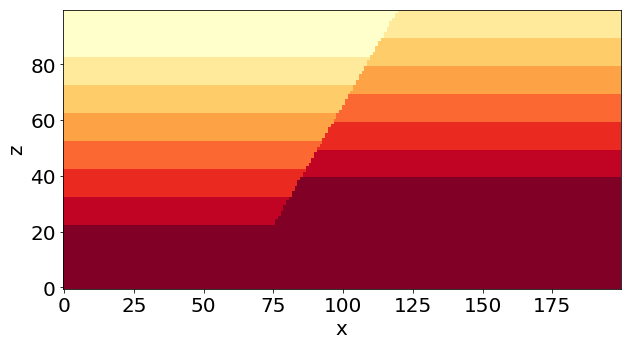

In [20]:
# Plot output
importlib.reload(pynoddy.output)
nout = pynoddy.output.NoddyOutput(output_name)
nout.plot_section('y', layer_labels = strati_options['layer_names'][::-1], 
                  colorbar = True, title = "",
                  savefig = False, fig_filename = "ex01_fault_E.eps")

In [21]:
# The following options define the fault geometry:
fault_options = {'name' : 'Fault_1',
                 'pos' : (5500, 3500, 0),
                 'dip_dir' : 270,
                 'dip' : 60,
                 'slip' : 1000}

nm.add_event('fault', fault_options)

In [22]:
nm.write_history(history)

In [23]:
# Compute the model
pynoddy.compute_model(history, output_name) 

''

/Users/flow/git/pynoddy/pynoddy/output.py:473: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  section_slice = data[:,cell_pos,:].transpose()


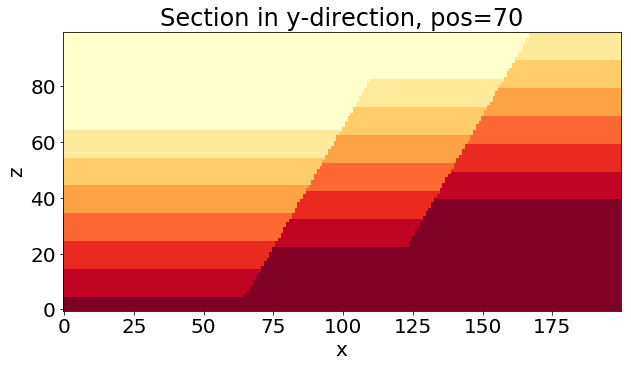

In [25]:
# Plot output
importlib.reload(pynoddy.output)
nout = pynoddy.output.NoddyOutput(output_name)
nout.plot_section('y', layer_labels = strati_options['layer_names'][::-1], colorbar = True)

In [26]:
nm1 = pynoddy.history.NoddyHistory(history)

IndexError: list index out of range

In [ ]:
nm1.get_extent()

Complete Model Set-up
--------------------

And here now, combining all the previous steps, the entire model set-up with base stratigraphy and two faults:

In [30]:
importlib.reload(pynoddy.history)
importlib.reload(pynoddy.events)
nm = pynoddy.history.NoddyHistory()
# add stratigraphy
strati_options = {'num_layers' : 8,
                  'layer_names' : ['layer 1', 'layer 2', 'layer 3',
                                   'layer 4', 'layer 5', 'layer 6', 
                                   'layer 7', 'layer 8'],
                  'layer_thickness' : [1500, 500, 500, 500, 500, 
                                       500, 500, 500]}
nm.add_event('stratigraphy', strati_options )

# The following options define the fault geometry:
fault_options = {'name' : 'Fault_W',
                 'pos' : (4000, 3500, 5000),
                 'dip_dir' : 90,
                 'dip' : 60,
                 'slip' : 1000}

nm.add_event('fault', fault_options)
# The following options define the fault geometry:
fault_options = {'name' : 'Fault_E',
                 'pos' : (6000, 3500, 5000),
                 'dip_dir' : 270,
                 'dip' : 60,
                 'slip' : 1000}

nm.add_event('fault', fault_options)
nm.write_history(history)

In [31]:
# Change cube size
nm1 = pynoddy.history.NoddyHistory(history)
nm1.change_cube_size(50)
nm1.write_history(history)

IndexError: list index out of range

In [32]:
# Compute the model
pynoddy.compute_model(history, output_name) 

''

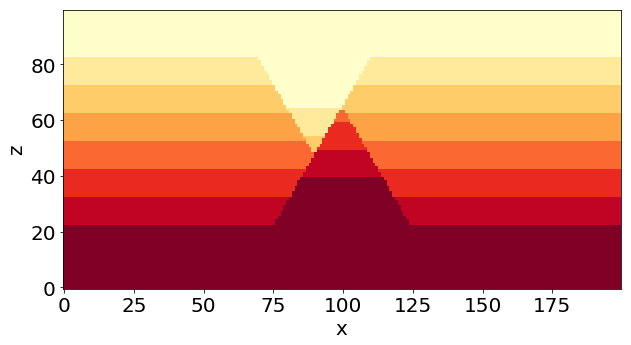

In [35]:
# Plot output
importlib.reload(pynoddy.output)
nout = pynoddy.output.NoddyOutput(output_name)
nout.plot_section('y', layer_labels = strati_options['layer_names'][::-1], 
                  colorbar = True, title="",
                  savefig = True, fig_filename = "ex01_faults_combined.eps",
                  cmap = 'YlOrRd') # note: YlOrRd colourmap should be suitable for colorblindness!
